<a href="https://colab.research.google.com/github/1804054Miraz/My_Thesis_Work/blob/main/visualize_EEG_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is 64 channles serially.

FP1
FP2
F7
F8
AF1
AF2
FZ
F4
F3
FC6
FC5
FC2
FC1
T8
T7
CZ
C3
C4
CP5
CP6
CP1
CP2
P3
P4
PZ
P8
P7
PO2
PO1
O2
O1
X
AF7
AF8
F5
F6
FT7
FT8
FPZ
FC4
FC3
C6
C5
F2
F1
TP8
TP7
AFZ
CP3
CP4
P5
P6
C1
C2
PO7
PO8
FCZ
POZ
OZ
P2
P1
CPZ
nd
Y

In [ ]:
%%capture
!pip install pandas seaborn matplotlib
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import welch

In [ ]:
# from google.colab import drive

# Replace this with the actual path to your CSV file in Google Drive
non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_000_S1obj.csv'
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_055_S2match.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(non_alcoholic_path)

# Drop the first row
# df = df.drop(0)

# If you want to reset the index after dropping the first row
# df = df.reset_index(drop=True)

# Save the modified DataFrame back to the original CSV file
df.shape

(256, 64)

In [ ]:
df.head()

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y
0,3.082,-5.056,16.449,-14.638,-0.020,-6.032,-3.988,-10.488,4.547,-2.340,...,9.023,19.725,-4.893,3.835,4.588,2.167,3.621,-1.333,2.797,26.194
1,2.594,-6.521,14.496,-17.080,0.468,-6.521,-3.988,-11.953,4.547,-3.805,...,-10.508,-10.549,-4.405,3.347,4.100,2.167,3.133,-0.844,2.309,24.729
2,2.106,-6.032,10.101,-16.103,1.445,-5.544,-2.523,-9.511,5.035,-4.781,...,6.093,1.658,-3.428,2.370,3.123,1.678,1.668,-1.333,1.821,18.870
3,2.106,-4.079,6.195,-11.220,2.909,-2.614,-0.570,-4.140,5.035,-3.316,...,2.675,3.123,-2.452,1.882,3.611,0.702,1.180,-1.821,1.821,13.499
4,3.571,-0.661,6.195,-3.896,3.886,0.804,1.383,0.743,5.524,-1.851,...,3.164,1.170,-1.475,2.858,5.076,0.214,1.668,-1.821,3.286,12.034


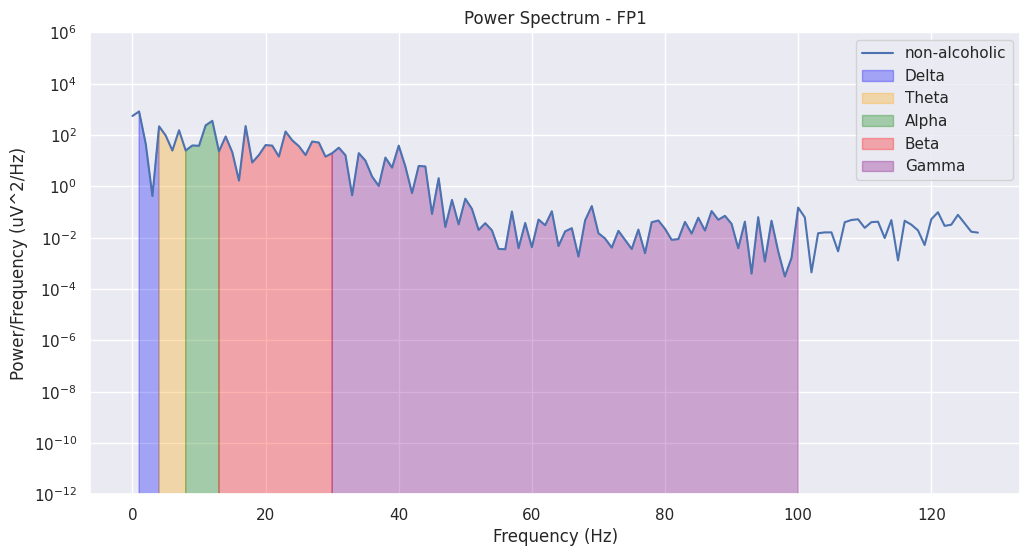

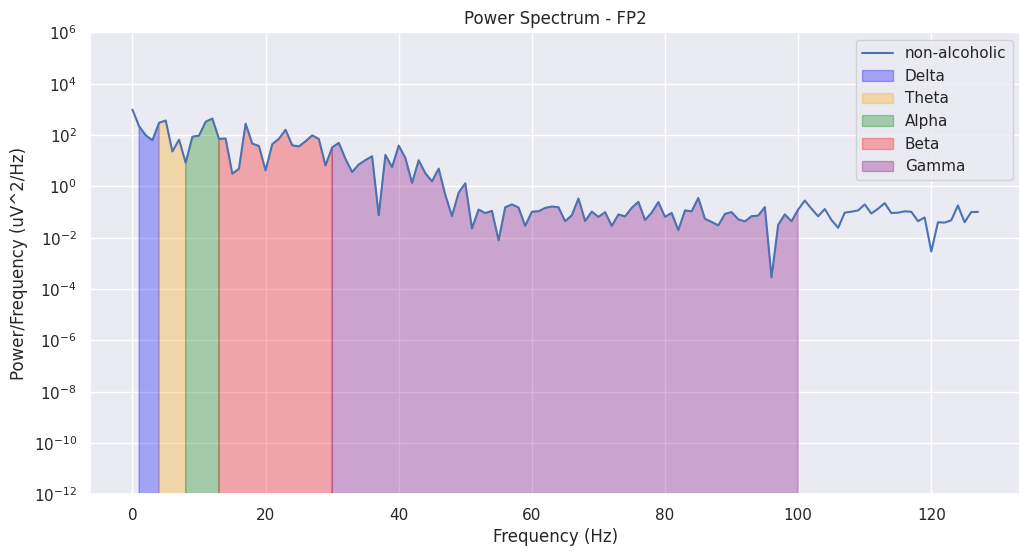

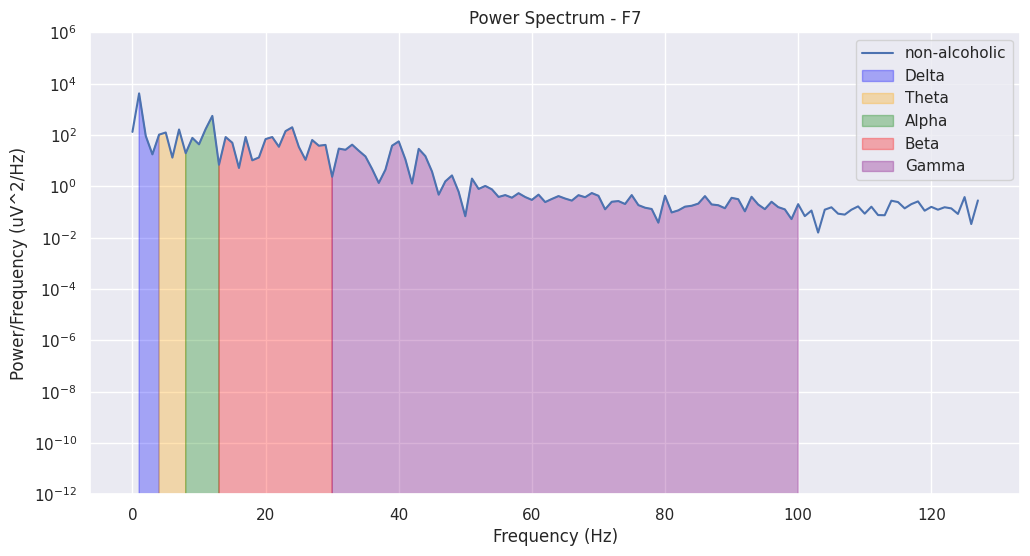

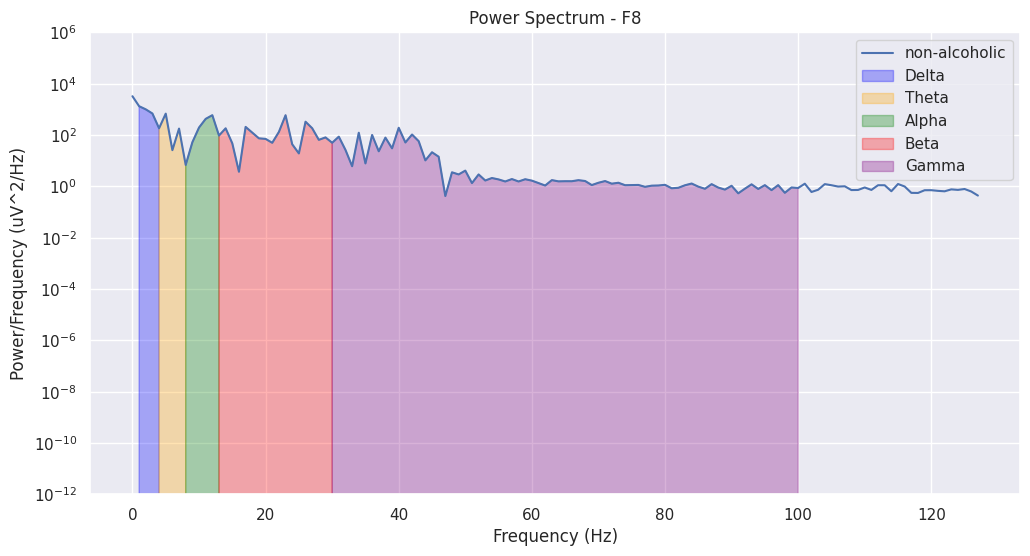

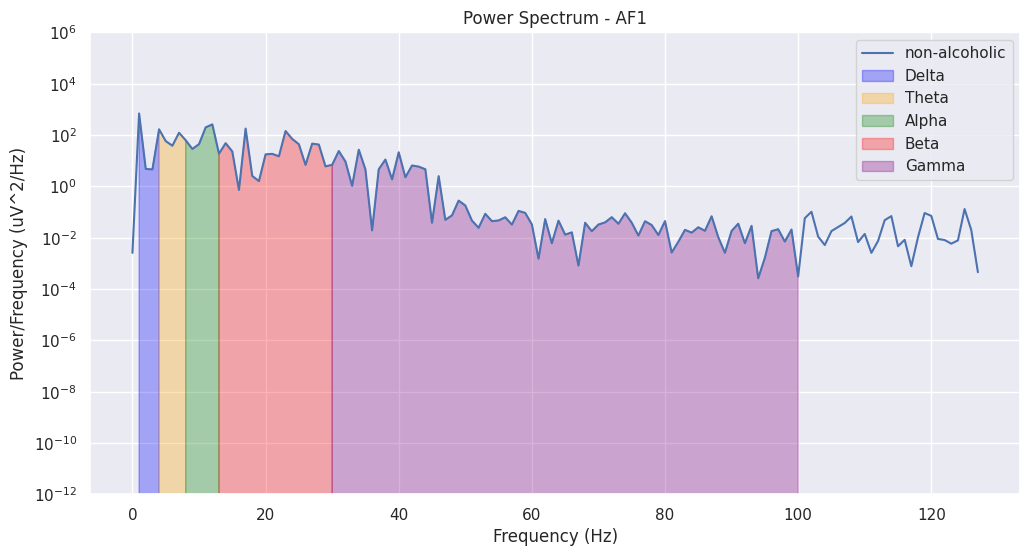

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(non_alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for a given channel
def plot_power_spectrum(data_column, column_name, label_name):
    frequencies, power_spectrum = calculate_power_spectrum(data_column, sampling_rate)

    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)  # Adjusted to include the beta range
    gamma_band = (30, 100)  # Example, adjust based on your data

    # Plot the power spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, power_spectrum, label=label_name)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.3, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.3, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.3, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.3, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.3, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data
    plt.title(f'Power Spectrum - {column_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend()
    plt.show()

# Plot power spectrum for each channel
i=1
for column in eeg_data.columns:
    plot_power_spectrum(eeg_data[column], column, 'non-alcoholic')
    if i==5:
      break;
    i+=1


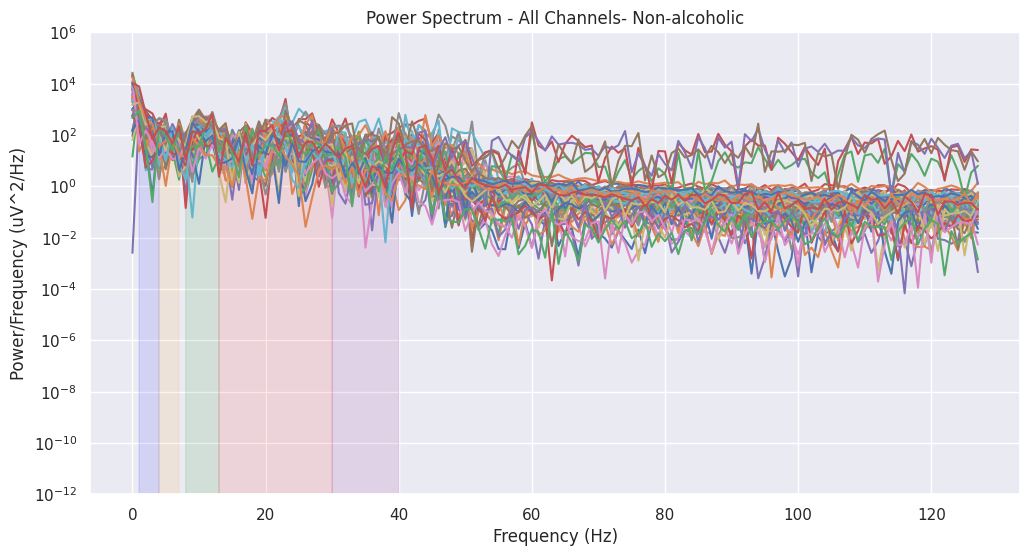

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(non_alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for all channels
def plot_power_spectrum_all_channels(eeg_data, sampling_rate):
    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 7)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 40)  # Example, adjust based on your data

    plt.figure(figsize=(12, 6))

    for column in eeg_data.columns:
        frequencies, power_spectrum = calculate_power_spectrum(eeg_data[column], sampling_rate)

        # Plot the power spectrum for each channel with different colors
        plt.plot(frequencies, power_spectrum, label=column)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data

    plt.title('Power Spectrum - All Channels- Non-alcoholic')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    # plt.legend()
    plt.show()

# Plot power spectrum for all channels
plot_power_spectrum_all_channels(eeg_data, sampling_rate)


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(alcoholic_path)

# Drop the first row
# df = df.drop(0)

# If you want to reset the index after dropping the first row
# df = df.reset_index(drop=True)

# Save the modified DataFrame back to the original CSV file
df.shape

(256, 64)

In [ ]:
df.head()

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y
0,2.126,-5.025,-3.998,5.524,2.065,4.333,1.404,-0.193,2.502,-2.797,...,-15.096,4.557,0.732,-3.072,-3.255,-3.265,-1.516,-0.529,2.167,0.783
1,4.567,-1.119,-3.510,4.547,4.018,3.845,2.869,0.295,4.456,-1.333,...,-2.401,-12.533,1.709,-4.537,-4.232,-4.242,-2.004,-1.506,5.585,3.225
2,6.521,2.787,-1.556,5.524,4.995,1.892,3.357,0.783,4.456,1.109,...,8.341,-0.814,2.197,-4.049,-4.232,-4.242,-2.492,-1.506,6.561,3.225
3,5.544,3.764,0.397,6.500,3.530,0.427,1.892,0.783,2.991,3.062,...,-3.377,2.604,1.709,-3.072,-1.790,-2.777,-2.004,-1.506,5.096,1.760
4,1.638,0.346,1.373,5.524,0.600,-1.038,0.427,-0.193,1.038,4.038,...,16.154,4.557,0.732,-1.119,1.139,-1.801,-0.051,-0.529,1.678,-0.193


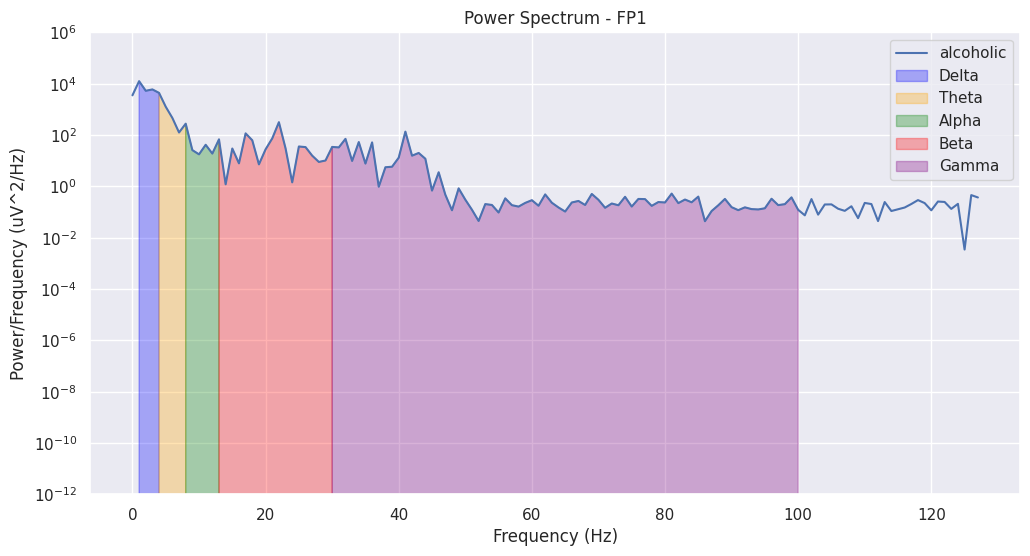

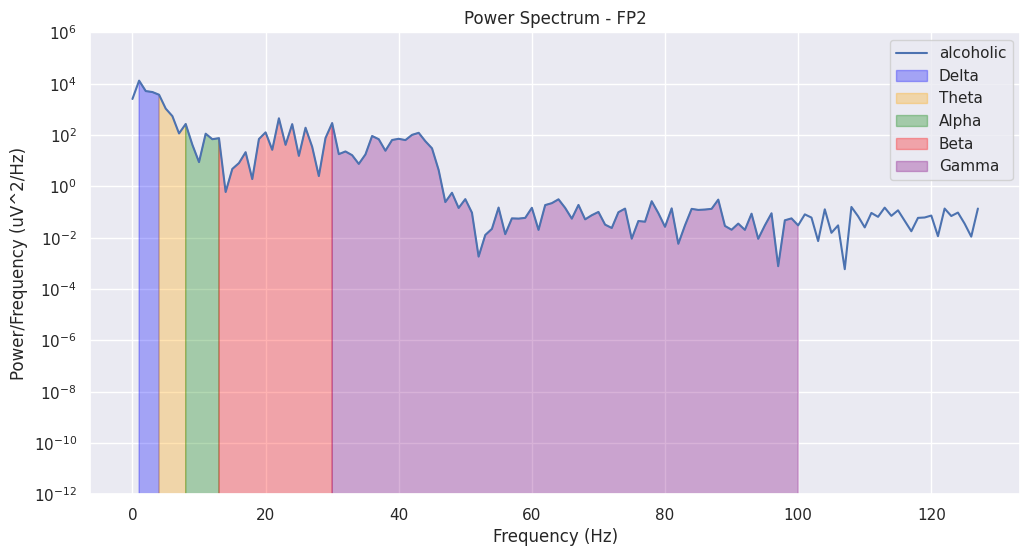

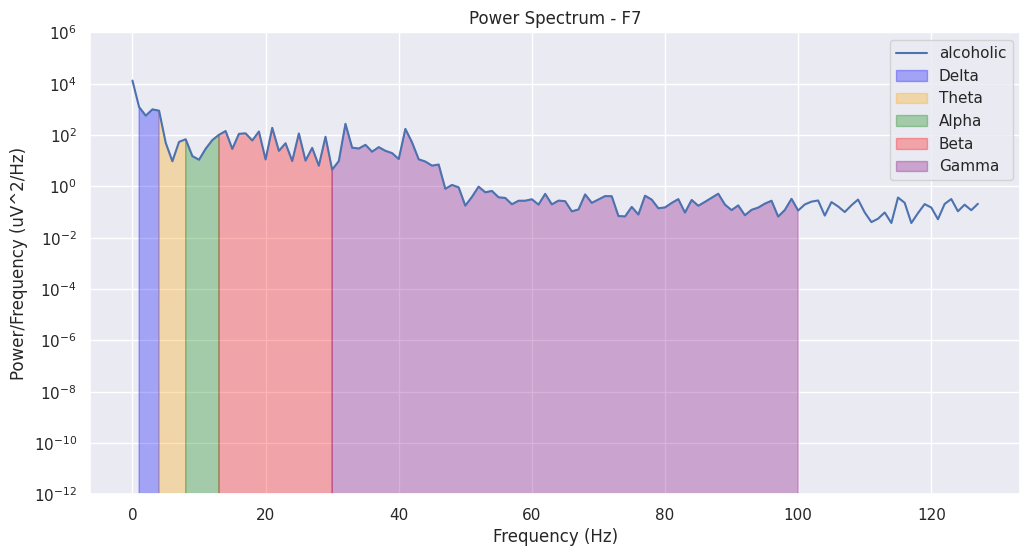

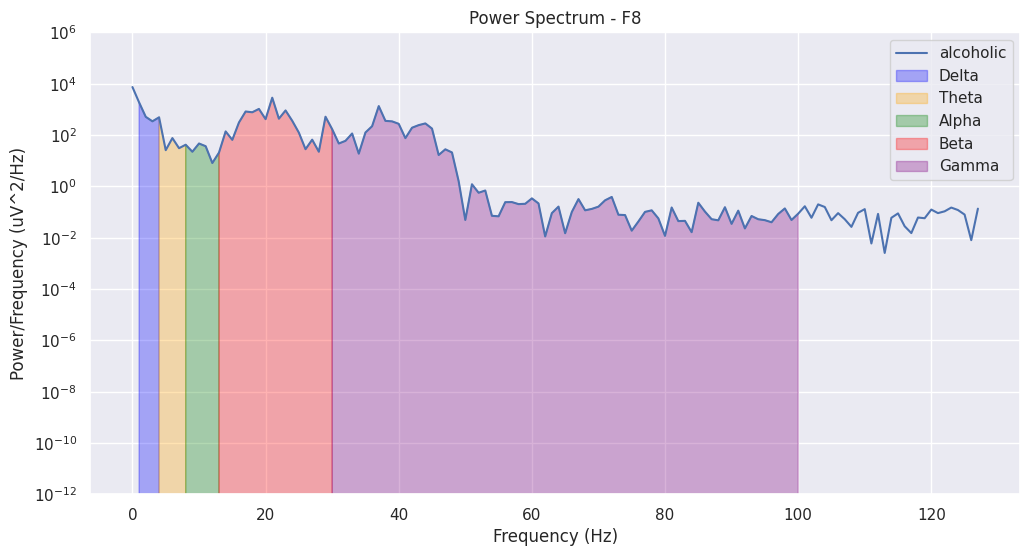

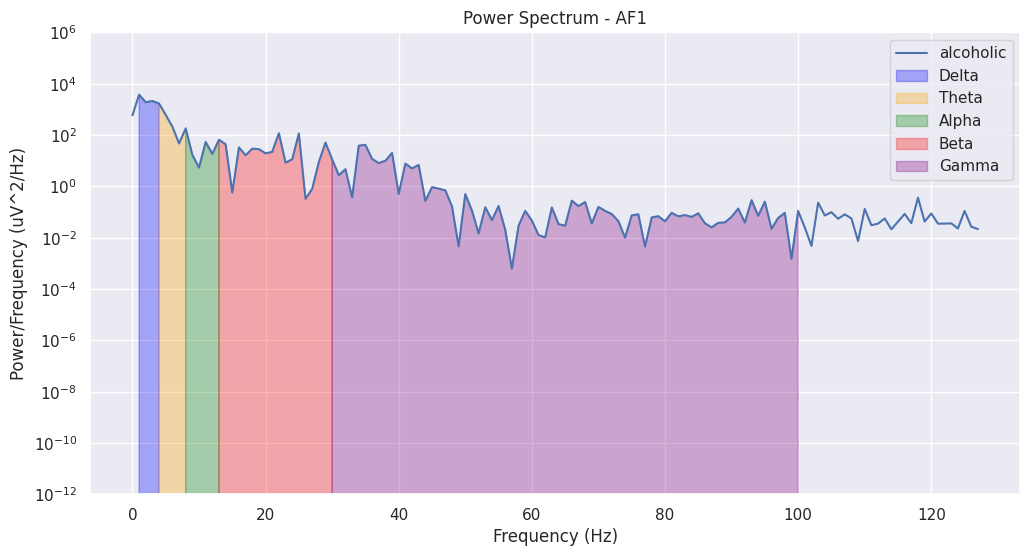

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for a given channel
def plot_power_spectrum(data_column, column_name, label_name):
    frequencies, power_spectrum = calculate_power_spectrum(data_column, sampling_rate)

    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)  # Adjusted to include the beta range
    gamma_band = (30, 100)  # Example, adjust based on your data

    # Plot the power spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, power_spectrum, label=label_name)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.3, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.3, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.3, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.3, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.3, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data
    plt.title(f'Power Spectrum - {column_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend()
    plt.show()

# Plot power spectrum for each channel
i=1
for column in eeg_data.columns:
    plot_power_spectrum(eeg_data[column], column, 'alcoholic')
    if i==5:
      break;
    i+=1


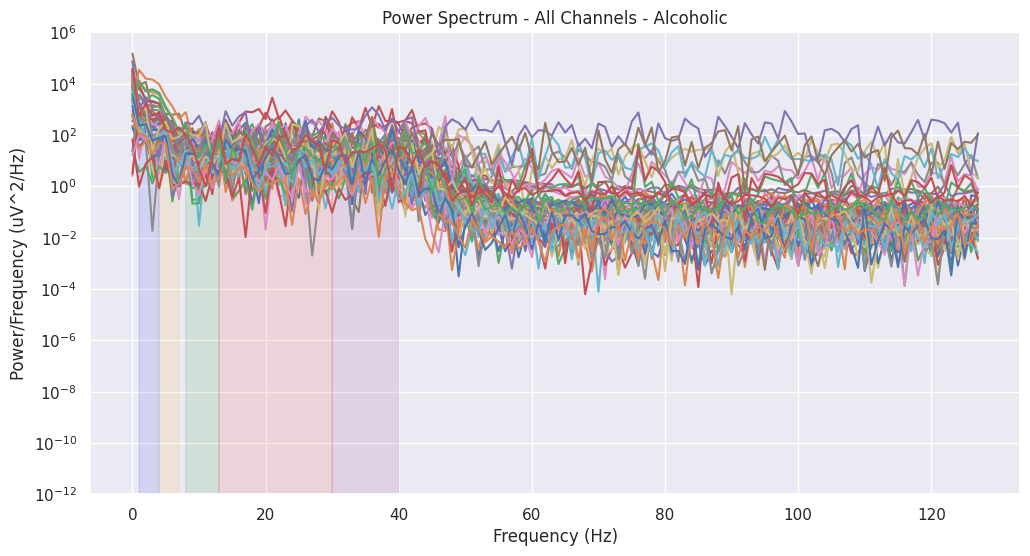

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for all channels
def plot_power_spectrum_all_channels(eeg_data, sampling_rate):
    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 7)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 40)  # Example, adjust based on your data

    plt.figure(figsize=(12, 6))

    for column in eeg_data.columns:
        frequencies, power_spectrum = calculate_power_spectrum(eeg_data[column], sampling_rate)

        # Plot the power spectrum for each channel with different colors
        plt.plot(frequencies, power_spectrum, label=column)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data

    plt.title('Power Spectrum - All Channels - Alcoholic')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    # plt.legend()
    plt.show()

# Plot power spectrum for all channels
plot_power_spectrum_all_channels(eeg_data, sampling_rate)


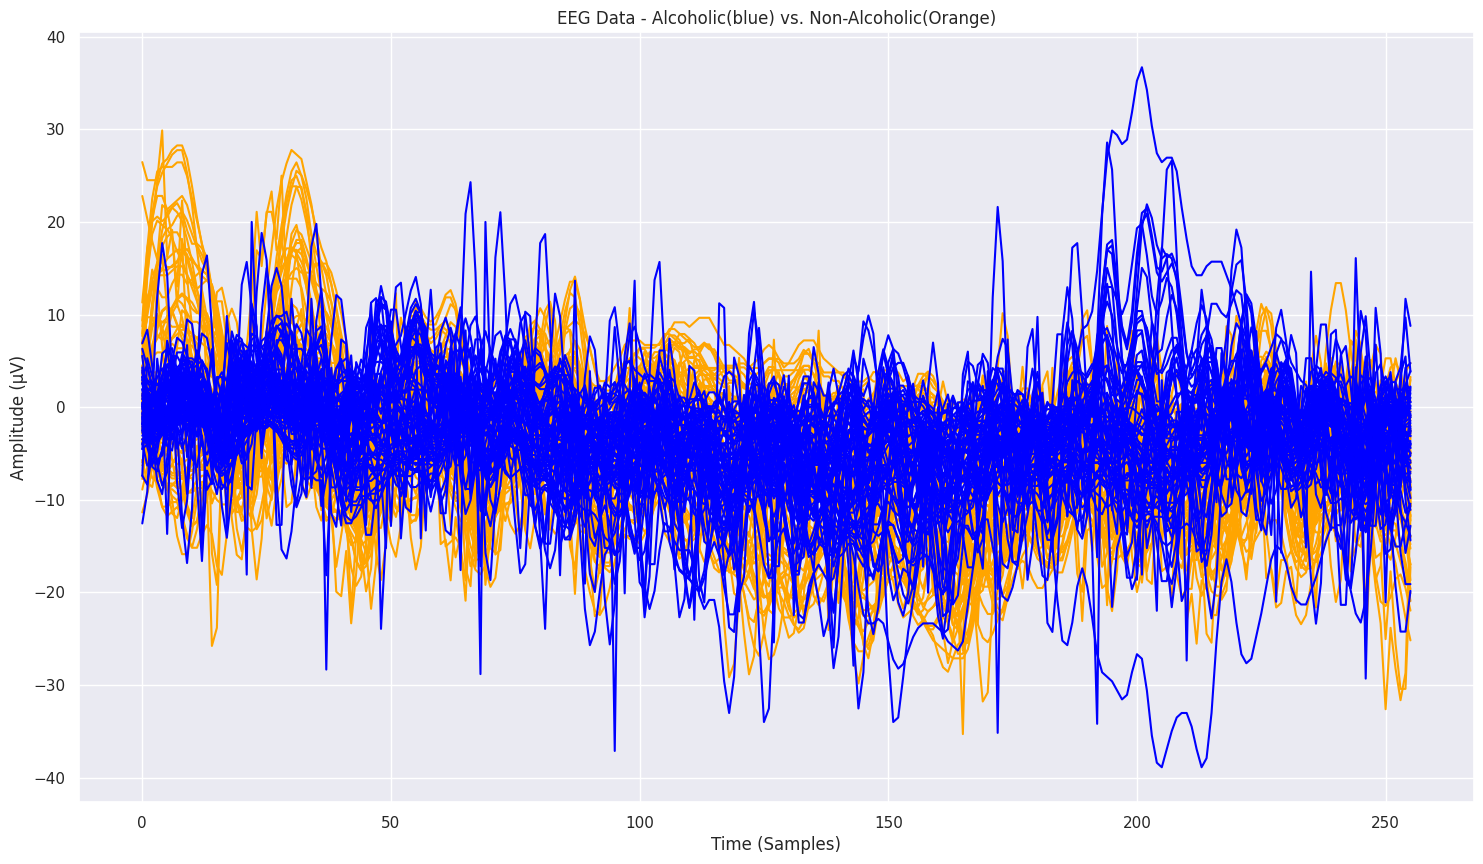

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG data for non-alcoholic and alcoholic paths
# non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_000_S1obj.csv'
non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_067_S2nomatch.csv'
# alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_055_S2match.csv'
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_119_S2match.csv'

non_alcoholic_data = pd.read_csv(non_alcoholic_path)
alcoholic_data = pd.read_csv(alcoholic_path)
# Plot each column separately
plt.figure(figsize=(18, 10))


i=0
for column in non_alcoholic_data.columns:
    plt.plot(non_alcoholic_data[column], label=column, color='orange' )
    # if i==6:
    #   break
    # i+=1

# Plot alcoholic data in blue
i=0
for column in alcoholic_data.columns:
    plt.plot(alcoholic_data[column], label=column, color='blue')
    # if i==6:
    #   break
    # i+=1
plt.title('EEG Data - Alcoholic(blue) vs. Non-Alcoholic(Orange)')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude (μV)')
# plt.legend()
plt.show()


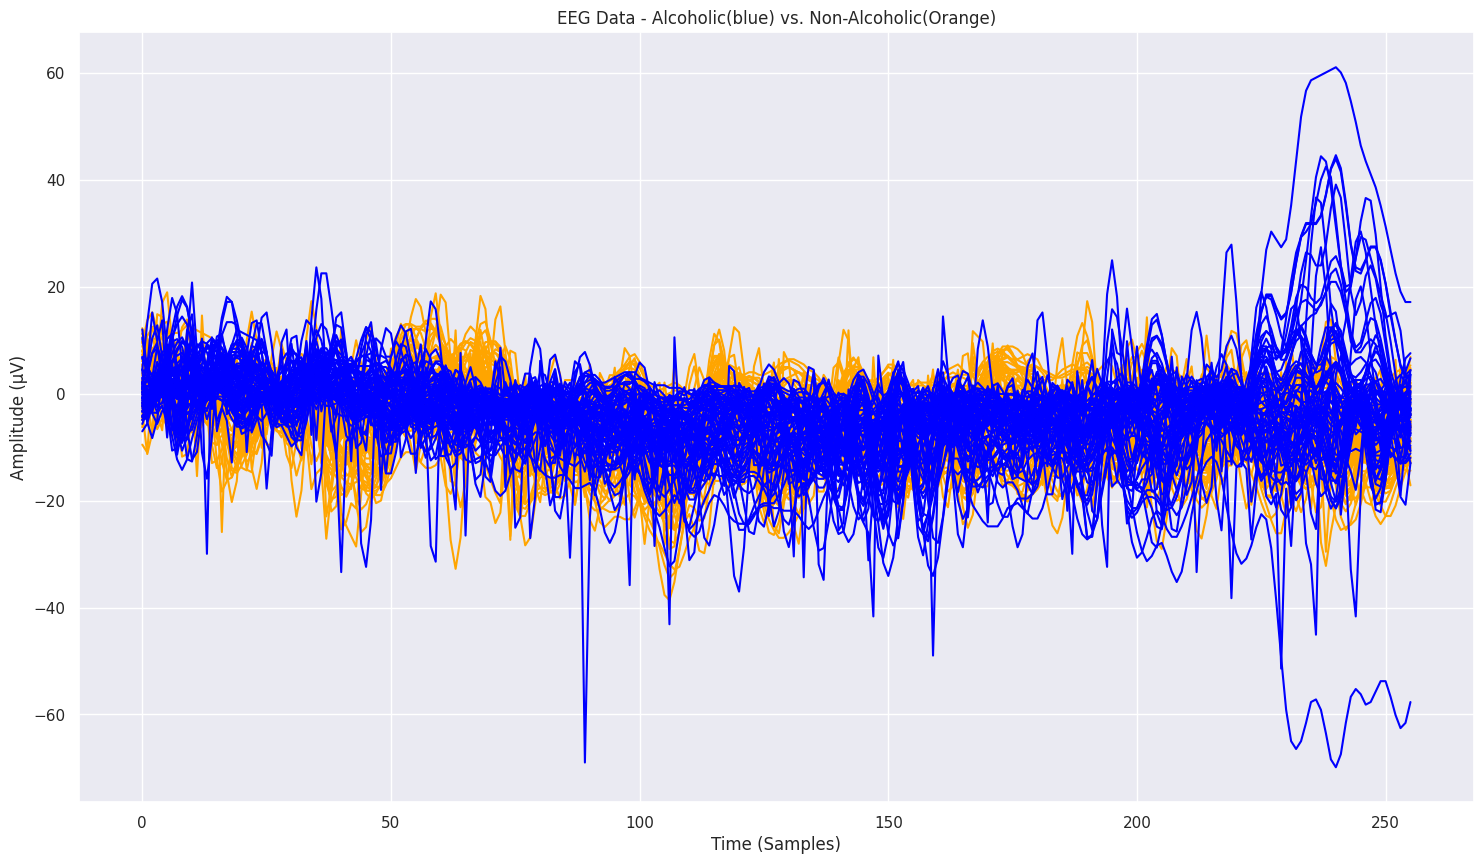

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG data for non-alcoholic and alcoholic paths
# non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_000_S1obj.csv'
non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_025_S2match.csv'
# alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_055_S2match.csv'
# alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_079_S2match.csv'
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_109_S2match.csv'

non_alcoholic_data = pd.read_csv(non_alcoholic_path)
alcoholic_data = pd.read_csv(alcoholic_path)
# Plot each column separately
plt.figure(figsize=(18, 10))


i=0
for column in non_alcoholic_data.columns:
    plt.plot(non_alcoholic_data[column], label=column, color='orange' )
    # if i==6:
    #   break
    # i+=1

# Plot alcoholic data in blue
i=0
for column in alcoholic_data.columns:
    plt.plot(alcoholic_data[column], label=column, color='blue')
    # if i==6:
    #   break
    # i+=1
plt.title('EEG Data - Alcoholic(blue) vs. Non-Alcoholic(Orange)')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude (μV)')
# plt.legend()
plt.show()
